In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.initializers import RandomNormal, RandomUniform
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalHinge
from tensorflow.keras import regularizers

In [28]:
dataset = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_heart.csv")

In [29]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [30]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [32]:
# Get Training Data
train_X, temporary_X, train_y, temporary_y = train_test_split(X, y, train_size=0.75, random_state=0)

# Get Validation & Testing Data
val_X, test_X, val_y, test_y = train_test_split(temporary_X, temporary_y, train_size=0.5, random_state=0)

In [33]:
scale=StandardScaler()
train_X  = scale.fit_transform(train_X)
test_X  = scale.transform(test_X)
val_X  = scale.transform(val_X)

In [34]:
 #Define Sequential model with 2layers
model = keras.Sequential(
    [
        layers.Dense(1, activation="sigmoid",activity_regularizer=regularizers.l2(0.0001), name="layer1"),
        layers.Dense(3, activation="sigmoid",activity_regularizer=regularizers.l2(0.0001), name="layer2"),
        layers.Dense(1, activation="sigmoid",activity_regularizer=regularizers.l2(0.0001), name="layer3")
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(train_X)

In [35]:
model.compile(loss=BinaryCrossentropy(), metrics=['accuracy'], optimizer=Adam(learning_rate=0.01))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (227, 1)                  14        
                                                                 
 layer2 (Dense)              (227, 3)                  6         
                                                                 
 layer3 (Dense)              (227, 1)                  4         
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [36]:
hist = model.fit(train_X, train_y, verbose=1, validation_data=(val_X, val_y), batch_size=16, epochs=500)

Epoch 1/500
15/15 [==============================] - 1s 18ms/step - loss: 0.7045 - accuracy: 0.5374 - val_loss: 0.6932 - val_accuracy: 0.5263
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5374 - val_loss: 0.6786 - val_accuracy: 0.5263
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5374 - val_loss: 0.6690 - val_accuracy: 0.5263
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.5374 - val_loss: 0.6603 - val_accuracy: 0.5263
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.6740 - val_loss: 0.6503 - val_accuracy: 0.7632
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.6344 - val_loss: 0.6393 - val_accuracy: 0.6842
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6290 - accuracy: 0.7577 - val_loss: 0.6279 - val_accuracy: 0.7895
Epoch 8/500


In [37]:
score, accuracy = model.evaluate(test_X, test_y, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Score) = 0.37
Test fraction correct (NN-Accuracy) = 0.87


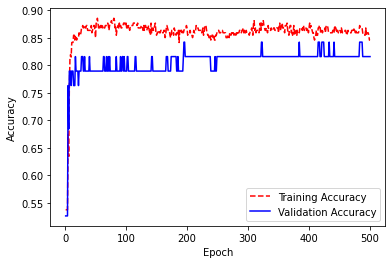

In [38]:
# Get training and test loss histories
training_loss = hist.history['accuracy']
val_loss = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

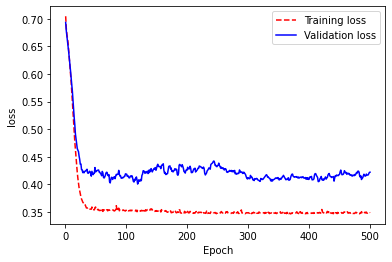

In [39]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()